In [177]:
import pandas as pd
import numpy as np
import datetime

import xgboost as xgb


%matplotlib inline

pd.set_option("max.colwidth", -1)
pd.set_option("max.columns", 100)

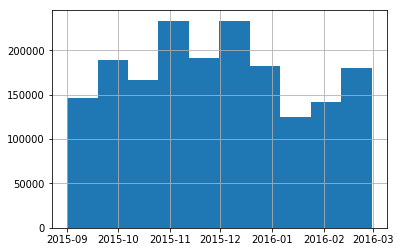

In [151]:
df.sk_date_decision.map(lambda x: datetime.date(int(str(x)[0:4]), int(str(x)[4:6]), int(str(x)[6:8]))).hist()

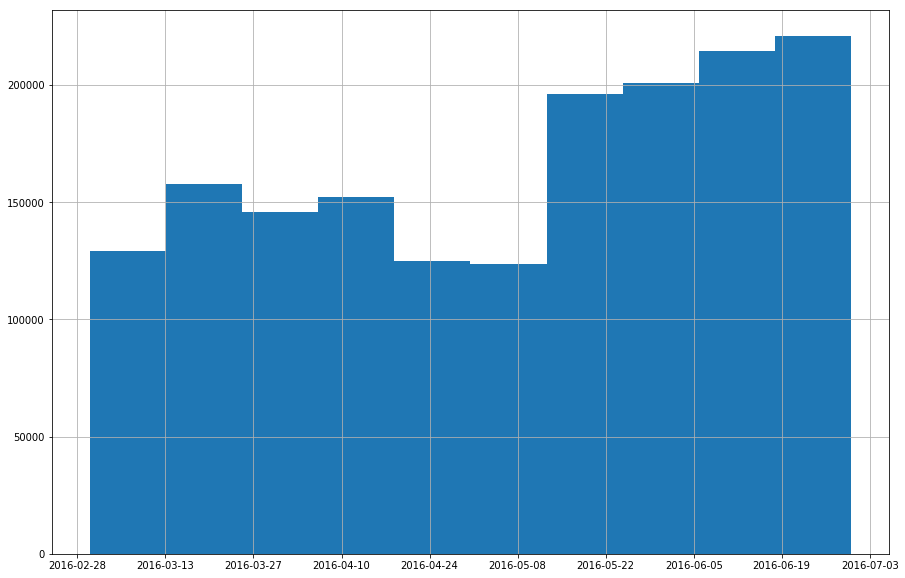

In [152]:
test.SK_DATE_DECISION.map(lambda x: datetime.date(int(str(x)[0:4]), int(str(x)[4:6]), int(str(x)[6:8]))).hist(figsize = [15,10])

In [153]:
test = pd.read_csv("test.csv")

In [154]:
df = pd.read_csv("train.csv")

columns = [x.lower() for x in df.columns]

df.columns = columns

df = df.drop(labels = "credit_collateral", axis = 1)

# intermediate aggregations

In [155]:
df.head(1)

,id,sk_date_decision,def,num_source,credit_active,credit_currency,dtime_credit,credit_day_overdue,dtime_credit_enddate,dtime_credit_enddate_fact,credit_facility,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_sum_type,credit_type,dtime_credit_update,credit_delay30,credit_delay5,credit_delay60,credit_delay90,credit_delay_more,amt_req_source_hour,amt_req_source_day,amt_req_source_week,amt_req_source_mon,amt_req_source_qrt,amt_req_source_year,amt_annuity,text_payment_discipline
0,24368,20150901,0,1,0,rur,27.03.2011,0,27.01.2012,25.01.2012,NaN,NaN,0,14949.0,0.0,0.0,0.0,1,5,26.01.2012,0,0,0,0,0,0,0,0,0,0,3,0.0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC0000000000


In [156]:
df["credit_id"] = df.id.astype(str) + df.dtime_credit.astype(str) + df.dtime_credit_enddate.astype(str)
df["sk_date_decision"] = df.sk_date_decision.map(lambda x: datetime.date(int(str(x)[0:4]), int(str(x)[4:6]), int(str(x)[6:8])))

In [157]:
grb = df.groupby("credit_id")["credit_active"].max().reset_index()
df = df.drop(labels = "credit_active", axis = 1).merge(grb, "inner", "credit_id")
df = df.join(pd.get_dummies(df.credit_active, prefix = "credit_active")).drop(labels = "credit_active", axis = 1)

grb = df.groupby("credit_id")["credit_currency"].max().reset_index()
df = df.drop(labels = "credit_currency", axis = 1).merge(grb, "inner", "credit_id")
df = df.join(pd.get_dummies(df.credit_currency, prefix = "credit_currency")).drop(labels = "credit_currency", axis = 1)

grb = df.groupby("credit_id")["credit_facility"].max().reset_index()
df = df.drop(labels = "credit_facility", axis = 1).merge(grb, "inner", "credit_id")
df = df.join(pd.get_dummies(df.credit_facility, prefix = "credit_facility", dummy_na = True)).drop(labels = "credit_facility", axis = 1)

df["amt_credit_max_overdue"] = df.amt_credit_max_overdue.fillna(0)
df["amt_credit_sum"] = df.amt_credit_sum.fillna(0)
df["amt_credit_sum_debt"] = df.amt_credit_sum_debt.fillna(0)
df["amt_credit_sum_limit_flg"] = df.amt_credit_sum_limit.map(lambda x: 1 if np.isnan(x) else 0)
df["amt_credit_sum_limit"] = df.amt_credit_sum_limit.fillna(0)

# better logic needed
grb = df.groupby("credit_id")["credit_type"].max().reset_index()
df = df.drop(labels = "credit_type", axis = 1).merge(grb, "inner", "credit_id")
df = df.join(pd.get_dummies(df.credit_type, prefix = "credit_type")).drop(labels = "credit_type", axis = 1)

df["amt_annuity_flg"] = df.amt_annuity.map(lambda x: 1 if np.isnan(x) else 0)
df["length"] = df.text_payment_discipline.map(lambda x: len(str(x)))

# get rid of credit duplicates

In [158]:
grb = df.groupby("credit_id")["credit_day_overdue"].max().reset_index()
df = df.drop(labels = "credit_day_overdue", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_max_overdue"].max().reset_index()
df = df.drop(labels = "amt_credit_max_overdue", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["cnt_credit_prolong"].max().reset_index()
df = df.drop(labels = "cnt_credit_prolong", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_sum"].max().reset_index()
df = df.drop(labels = "amt_credit_sum", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_sum_debt"].max().reset_index()
df = df.drop(labels = "amt_credit_sum_debt", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_sum_limit"].max().reset_index()
df = df.drop(labels = "amt_credit_sum_limit", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_sum_overdue"].max().reset_index()
df = df.drop(labels = "amt_credit_sum_overdue", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_sum_type"].max().reset_index()
df = df.drop(labels = "credit_sum_type", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_delay30"].max().reset_index()
df = df.drop(labels = "credit_delay30", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_delay60"].max().reset_index()
df = df.drop(labels = "credit_delay60", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_delay90"].max().reset_index()
df = df.drop(labels = "credit_delay90", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_delay5"].max().reset_index()
df = df.drop(labels = "credit_delay5", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["credit_delay_more"].max().reset_index()
df = df.drop(labels = "credit_delay_more", axis = 1).merge(grb, "inner", "credit_id")


grb = df.groupby("credit_id")["amt_req_source_hour"].max().reset_index()
df = df.drop(labels = "amt_req_source_hour", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_req_source_day"].max().reset_index()
df = df.drop(labels = "amt_req_source_day", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_req_source_week"].max().reset_index()
df = df.drop(labels = "amt_req_source_week", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_req_source_mon"].max().reset_index()
df = df.drop(labels = "amt_req_source_mon", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_req_source_qrt"].max().reset_index()
df = df.drop(labels = "amt_req_source_qrt", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_req_source_year"].max().reset_index()
df = df.drop(labels = "amt_req_source_year", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_annuity"].max().reset_index()
df = df.drop(labels = "amt_annuity", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_credit_sum_limit_flg"].max().reset_index()
df = df.drop(labels = "amt_credit_sum_limit_flg", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["amt_annuity_flg"].max().reset_index()
df = df.drop(labels = "amt_annuity_flg", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["text_payment_discipline"].first().reset_index()
df = df.drop(labels = "text_payment_discipline", axis = 1).merge(grb, "inner", "credit_id")

grb = df.groupby("credit_id")["length"].max().reset_index()
df = df.drop(labels = "length", axis = 1).merge(grb, "inner", "credit_id")

In [159]:
d = df.drop(labels = "num_source", axis = 1).drop_duplicates()

# user aggregation

In [160]:
d = d.drop(labels = ["dtime_credit","dtime_credit_enddate","dtime_credit_enddate_fact","dtime_credit_update","credit_id"], axis = 1)

In [161]:
grb = d.groupby("id")["credit_active_0"].sum().reset_index()
d = d.drop(labels = "credit_active_0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_active_1"].sum().reset_index()
d = d.drop(labels = "credit_active_1", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_active_2"].sum().reset_index()
d = d.drop(labels = "credit_active_2", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_active_3"].sum().reset_index()
d = d.drop(labels = "credit_active_3", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_currency_chf"].sum().reset_index()
d = d.drop(labels = "credit_currency_chf", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_currency_eur"].sum().reset_index()
d = d.drop(labels = "credit_currency_eur", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_currency_rur"].sum().reset_index()
d = d.drop(labels = "credit_currency_rur", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_currency_usd"].sum().reset_index()
d = d.drop(labels = "credit_currency_usd", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_facility_0.0"].sum().reset_index()
d = d.drop(labels = "credit_facility_0.0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_facility_1.0"].sum().reset_index()
d = d.drop(labels = "credit_facility_1.0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_facility_2.0"].sum().reset_index()
d = d.drop(labels = "credit_facility_2.0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_facility_9.0"].sum().reset_index()
d = d.drop(labels = "credit_facility_9.0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_facility_nan"].sum().reset_index()
d = d.drop(labels = "credit_facility_nan", axis = 1).merge(grb, "inner", "id")


grb = d.groupby("id")["credit_type_0"].sum().reset_index()
d = d.drop(labels = "credit_type_0", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_1"].sum().reset_index()
d = d.drop(labels = "credit_type_1", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_3"].sum().reset_index()
d = d.drop(labels = "credit_type_3", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_4"].sum().reset_index()
d = d.drop(labels = "credit_type_4", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_5"].sum().reset_index()
d = d.drop(labels = "credit_type_5", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_6"].sum().reset_index()
d = d.drop(labels = "credit_type_6", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_7"].sum().reset_index()
d = d.drop(labels = "credit_type_7", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_8"].sum().reset_index()
d = d.drop(labels = "credit_type_8", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_9"].sum().reset_index()
d = d.drop(labels = "credit_type_9", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_10"].sum().reset_index()
d = d.drop(labels = "credit_type_10", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_18"].sum().reset_index()
d = d.drop(labels = "credit_type_18", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_19"].sum().reset_index()
d = d.drop(labels = "credit_type_19", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_type_99"].sum().reset_index()
d = d.drop(labels = "credit_type_99", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_day_overdue"].max().reset_index()
d = d.drop(labels = "credit_day_overdue", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_max_overdue"].max().reset_index()
d = d.drop(labels = "amt_credit_max_overdue", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_max_overdue"].max().reset_index()
d = d.drop(labels = "amt_credit_max_overdue", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["cnt_credit_prolong"].max().reset_index()
d = d.drop(labels = "cnt_credit_prolong", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["cnt_credit_prolong"].sum().reset_index()
d = d.drop(labels = "cnt_credit_prolong", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_sum"].sum().reset_index()
d = d.drop(labels = "amt_credit_sum", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_sum_debt"].sum().reset_index()
d = d.drop(labels = "amt_credit_sum_debt", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_sum_limit"].sum().reset_index()
d = d.drop(labels = "amt_credit_sum_limit", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_sum_overdue"].sum().reset_index()
d = d.drop(labels = "amt_credit_sum_overdue", axis = 1).merge(grb, "inner", "id")

# needed better logic
grb = d.groupby("id")["credit_sum_type"].max().reset_index()
d = d.drop(labels = "credit_sum_type", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_delay30"].sum().reset_index()
d = d.drop(labels = "credit_delay30", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_delay60"].sum().reset_index()
d = d.drop(labels = "credit_delay60", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_delay90"].sum().reset_index()
d = d.drop(labels = "credit_delay90", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_delay5"].sum().reset_index()
d = d.drop(labels = "credit_delay5", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["credit_delay_more"].sum().reset_index()
d = d.drop(labels = "credit_delay_more", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_hour"].max().reset_index()
d = d.drop(labels = "amt_req_source_hour", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_day"].max().reset_index()
d = d.drop(labels = "amt_req_source_day", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_week"].max().reset_index()
d = d.drop(labels = "amt_req_source_week", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_mon"].max().reset_index()
d = d.drop(labels = "amt_req_source_mon", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_qrt"].max().reset_index()
d = d.drop(labels = "amt_req_source_qrt", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_req_source_year"].max().reset_index()
d = d.drop(labels = "amt_req_source_year", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_annuity"].sum().reset_index()
d = d.drop(labels = "amt_annuity", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_credit_sum_limit_flg"].max().reset_index()
d = d.drop(labels = "amt_credit_sum_limit_flg", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["amt_annuity_flg"].max().reset_index()
d = d.drop(labels = "amt_annuity_flg", axis = 1).merge(grb, "inner", "id")

grb = d.groupby("id")["length"].max().reset_index()
d = d.drop(labels = "length", axis = 1).merge(grb, "inner", "id")



grb = d.groupby("id").size().reset_index().rename(columns = {0 : "credits_num"})
d = d.merge(grb, "inner", "id")

In [170]:
d = d.drop(labels = "text_payment_discipline", axis = 1).drop_duplicates().reset_index(drop = True)

In [174]:
features = [x for x in d.columns if x not in ["id","sk_date_decision","def"]]

In [239]:
train = d[0:100000]
test = d[100000:len(d)+1].reset_index(drop = True)

d_train = xgb.DMatrix(train[features], train["def"])
d_test = xgb.DMatrix(test[features], test["def"])

In [234]:
m = d.groupby("sk_date_decision")["def"].mean().reset_index().sort_values(by = "sk_date_decision").reset_index(drop = True)

In [199]:
# XGBoost tuning
def score(params):
    seed=int(np.random.rand()*100000)
    cv_res=xgb.cv(params, d_train, 
              early_stopping_rounds=10, maximize=False, num_boost_round=500, nfold=3, seed=seed, verbose_eval=10)
    score=cv_res['test-logloss-mean'].min()
    best_iter=cv_res[cv_res['test-logloss-mean']==cv_res['test-logloss-mean'].min()].index[0]
    print(score)
    return (score, best_iter, seed) 

best=(1, )
for max_depth in [2,4,6]:
    for eta in [0.1, 0.05, 0.01] :
        params = {
        'eta': eta,
        'max_depth': max_depth,
        'subsample': 0.7,
        #'colsample_bytree': 0.5,
        'objective': 'binary:logistic',
        'booster': 'gbtree',  
        'eval_metric': 'logloss',
        'tree_method': 'approx',
        'silent': 1
        }
        res=score(params)
        if res[0]<best[0]:
            best=res + (params,)

[0]	train-logloss:0.610866+0.000148255	test-logloss:0.610871+0.000239351
[10]	train-logloss:0.254735+0.00142565	test-logloss:0.254838+0.00158777
[20]	train-logloss:0.171584+0.00196812	test-logloss:0.171835+0.00279456
[30]	train-logloss:0.151263+0.0022319	test-logloss:0.151739+0.00362069
[40]	train-logloss:0.146458+0.00222449	test-logloss:0.147192+0.004215
[50]	train-logloss:0.144774+0.00227874	test-logloss:0.145783+0.0044291
[60]	train-logloss:0.143868+0.00229621	test-logloss:0.145147+0.00450727
[70]	train-logloss:0.143159+0.00231235	test-logloss:0.144742+0.00457324
[80]	train-logloss:0.142622+0.00230122	test-logloss:0.14448+0.00457263
[90]	train-logloss:0.142138+0.00226364	test-logloss:0.144166+0.00461108
[100]	train-logloss:0.141752+0.0022648	test-logloss:0.143943+0.0046225
[110]	train-logloss:0.141452+0.00226977	test-logloss:0.143818+0.00464702
[120]	train-logloss:0.141151+0.00227104	test-logloss:0.143682+0.00467138
[130]	train-logloss:0.140897+0.00227435	test-logloss:0.143635+0.004

In [200]:
best

(0.14335999999999999,
 376,
 2632,
 {'booster': 'gbtree',
  'eta': 0.05,
  'eval_metric': 'logloss',
  'max_depth': 2,
  'objective': 'binary:logistic',
  'silent': 1,
  'subsample': 0.7,
  'tree_method': 'approx'})

In [241]:
params = {'max_depth': 4,
          'eta': 0.05,
          'subsample': 0.7,
          'colsample_bytree': 0.8,
          'lambda': 1,
          'alpha' : 0,
          'objective': 'binary:logistic',
          'eval_metric': ['auc'],
          'seed': 1543,
          'silent': True,
          'nthread': -1
         }

watchlist  = [(d_train,'train'), (d_test,'test')]

num_trees = 1000

model = xgb.train(params, d_train, num_trees, evals = watchlist, early_stopping_rounds = 50)

[0]	train-auc:0.606173	test-auc:0.571218
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
[1]	train-auc:0.626301	test-auc:0.594627
[2]	train-auc:0.638671	test-auc:0.609281
[3]	train-auc:0.644989	test-auc:0.60807
[4]	train-auc:0.647833	test-auc:0.609131
[5]	train-auc:0.650808	test-auc:0.608982
[6]	train-auc:0.651366	test-auc:0.608325
[7]	train-auc:0.652889	test-auc:0.609765
[8]	train-auc:0.65345	test-auc:0.610537
[9]	train-auc:0.654148	test-auc:0.609867
[10]	train-auc:0.654842	test-auc:0.609526
[11]	train-auc:0.656063	test-auc:0.609293
[12]	train-auc:0.656746	test-auc:0.611017
[13]	train-auc:0.657948	test-auc:0.612368
[14]	train-auc:0.659081	test-auc:0.615194
[15]	train-auc:0.65891	test-auc:0.616273
[16]	train-auc:0.660738	test-auc:0.617093
[17]	train-auc:0.660725	test-auc:0.616902
[18]	train-auc:0.661307	test-auc:0.616869
[19]	train-auc:0.661915	test-auc:0.616712
[20]	train-auc:0.66224	test-auc:

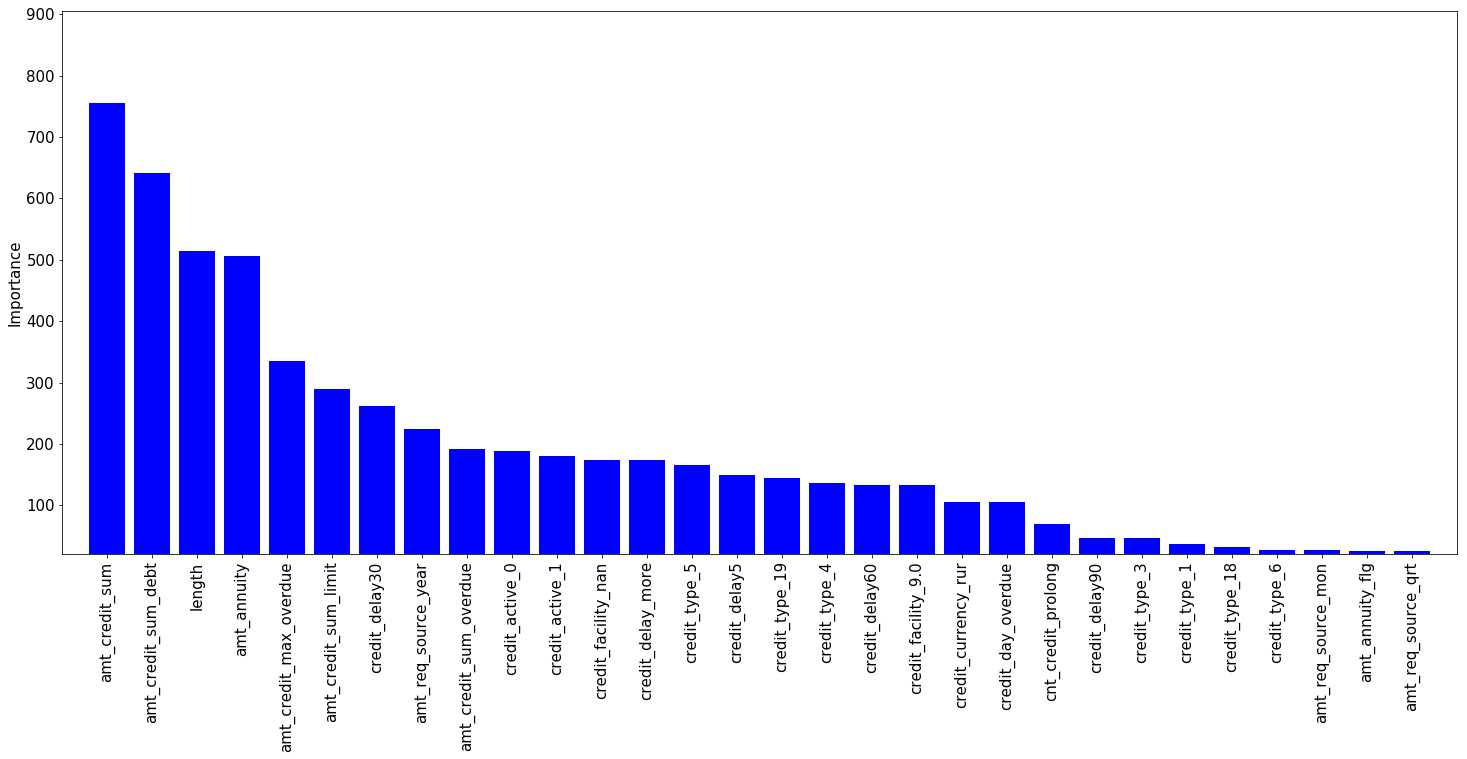

In [192]:
#feature importance
import matplotlib.pyplot as plt
%matplotlib inline
fs = model.get_fscore()
imp=sorted([(k, v) for k, v in fs.items()], key=lambda x:x[1], reverse=True)
imp=imp[:30]
fig=plt.figure(figsize=(25,10))
ax=fig.add_subplot(111)
#ax.set_yscale('log')
ax.bar(range(len(imp)), [v for k, v in imp], color="blue",  align='center')
#plt.xticks(rotation=45)
plt.xticks(range(len(imp)), [k for k, v in imp], fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Importance',fontsize=15)
plt.xlim([-1, len(imp)])
plt.ylim([min([v for k, v in imp])*0.8, max([v for k, v in imp])*1.2])
plt.draw()
plt.savefig('fi')

In [219]:
submit_ex = pd.read_csv("sample2submit.csv")

In [206]:
test_processed = pd.read_csv("test_processed.csv").drop(labels = "Unnamed: 0", axis = 1)

In [208]:
d_test = xgb.DMatrix(test_processed[features])

In [209]:
score = model.predict(d_test)


In [213]:
submit = pd.DataFrame()
submit["ID"] = test_processed["id"]
submit["Score"] = score

In [225]:
submit.drop_duplicates().reset_index(drop = True).to_csv("subm.csv", index = False)

In [223]:
len(submit)

120569

In [224]:
len(submit.drop_duplicates())

120567

In [220]:
submit_ex

,ID,Score
0,174640,0.5
1,174641,0.5
2,174642,0.5
3,174643,0.5
4,174644,0.5
5,174645,0.5
6,174646,0.5
7,174647,0.5
8,174648,0.5
9,174650,0.5


In [222]:
submit == submit_ex

ValueError: Can only compare identically-labeled DataFrame objects